In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
np.random.seed(42)

In [42]:
df = pd.read_excel('dzienne_ceny_gazu.xlsx')

In [43]:
df = df[['Data', 'Zamknięcie']]

In [44]:
df = df.rename(columns={'Data' : 'Date', 'Zamknięcie' : 'Gas price'})

In [45]:
df = df.set_index('Date')

In [46]:
df.describe()

,Gas price
count,3108.000000
mean,3.266500
std,0.885656
min,1.544000
25%,2.659000
50%,3.041500
75%,3.935000
max,6.312000


In [47]:
train_data = df['2010-01-04': '2021-05-31']
test_data = df['2021-06-01':]

In [49]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(train_data)
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Model numer 6 - Rekurencyjna sieć neuronowa GRU

In [50]:
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.GRU(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True, activation = 'relu'))
model6.add(tf.keras.layers.GRU(units=50, return_sequences=True))
model6.add(tf.keras.layers.GRU(units=50))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Dense(units=1))
model6.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='loss', patience=10)
model6.fit(X_train, y_train, epochs= 70, batch_size=32, 
          verbose=2, callbacks=[early_stopping])

Epoch 1/100
90/90 - 7s - loss: 0.0106 - 7s/epoch - 81ms/step
Epoch 2/100
90/90 - 4s - loss: 0.0020 - 4s/epoch - 45ms/step
Epoch 3/100
90/90 - 5s - loss: 0.0017 - 5s/epoch - 55ms/step
Epoch 4/100
90/90 - 5s - loss: 0.0014 - 5s/epoch - 59ms/step
Epoch 5/100
90/90 - 5s - loss: 0.0014 - 5s/epoch - 52ms/step
Epoch 6/100
90/90 - 5s - loss: 0.0013 - 5s/epoch - 54ms/step
Epoch 7/100
90/90 - 6s - loss: 0.0013 - 6s/epoch - 62ms/step
Epoch 8/100
90/90 - 5s - loss: 0.0012 - 5s/epoch - 58ms/step
Epoch 9/100
90/90 - 5s - loss: 0.0012 - 5s/epoch - 61ms/step
Epoch 10/100
90/90 - 7s - loss: 0.0011 - 7s/epoch - 78ms/step
Epoch 11/100
90/90 - 7s - loss: 0.0012 - 7s/epoch - 81ms/step
Epoch 12/100
90/90 - 7s - loss: 0.0011 - 7s/epoch - 78ms/step
Epoch 13/100
90/90 - 7s - loss: 9.8604e-04 - 7s/epoch - 79ms/step
Epoch 14/100
90/90 - 7s - loss: 0.0011 - 7s/epoch - 76ms/step
Epoch 15/100
90/90 - 7s - loss: 9.7671e-04 - 7s/epoch - 81ms/step
Epoch 16/100
90/90 - 7s - loss: 9.9553e-04 - 7s/epoch - 78ms/step
Epoch

In [58]:
new_df6 = pd.concat((train_data, test_data), axis=0)
new_df6 = pd.concat((train_data, test_data), axis=0)
inputs6 = new_df[len(new_df6) - len(test_data)- 60:].values
inputs6 = inputs.reshape(-1,1)
inputs6 = scaler.transform(inputs6)
X_test = []
y_test = []
for i in range (60, 248):
    X_test.append(inputs6[i-60:i, 0])
    y_test.append(scaled_data[i,0])
      
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price6 = model6.predict(X_test)
predicted_price6 = scaler.inverse_transform(predicted_price6)
print(predicted_price6)

[[2.9837837]
 [3.0935159]
 [3.0671873]
 [3.037579 ]
 [3.0895147]
 [3.0629663]
 [3.1195965]
 [3.119662 ]
 [3.140101 ]
 [3.2811112]
 [3.3339229]
 [3.2273567]
 [3.2406573]
 [3.2393363]
 [3.2032738]
 [3.1809294]
 [3.2453005]
 [3.316599 ]
 [3.398598 ]
 [3.473735 ]
 [3.567922 ]
 [3.6042461]
 [3.625399 ]
 [3.6363099]
 [3.6745205]
 [3.6123838]
 [3.5751486]
 [3.663706 ]
 [3.6472862]
 [3.723665 ]
 [3.6690502]
 [3.6374197]
 [3.591654 ]
 [3.6505234]
 [3.7505748]
 [3.845173 ]
 [3.924722 ]
 [3.967882 ]
 [4.02336  ]
 [4.0446205]
 [3.9095905]
 [3.9391463]
 [4.022087 ]
 [3.8808706]
 [3.909105 ]
 [3.9915462]
 [4.1163526]
 [4.0998435]
 [4.1029487]
 [4.0250587]
 [4.05451  ]
 [4.0234785]
 [3.901826 ]
 [3.8338685]
 [3.9173932]
 [3.805363 ]
 [3.8269823]
 [3.8011143]
 [3.8235815]
 [3.927774 ]
 [3.8838582]
 [3.8965683]
 [4.1659255]
 [4.3340025]
 [4.257667 ]
 [4.3328934]
 [4.5604954]
 [4.581035 ]
 [4.655808 ]
 [4.508574 ]
 [4.785919 ]
 [4.8982506]
 [4.8611054]
 [5.031505 ]
 [5.0917583]
 [5.228952 ]
 [5.1770835]

In [59]:
predictions = pd.DataFrame(predicted_price)
predictions.rename(columns = {0: 'Predicted gas price'}, inplace=True); 
predictions.index = test_data.index
final_df = pd.concat([test_data, predictions],1)
final_df

,Gas price,Predicted gas price
Date,,
2021-06-01,3.104,2.983784
2021-06-02,3.075,3.093516
2021-06-03,3.041,3.067187
2021-06-04,3.097,3.037579
2021-06-07,3.070,3.089515
...,...,...
2022-02-22,4.461,4.387745
2022-02-23,4.593,4.412509
2022-02-24,4.641,4.540978


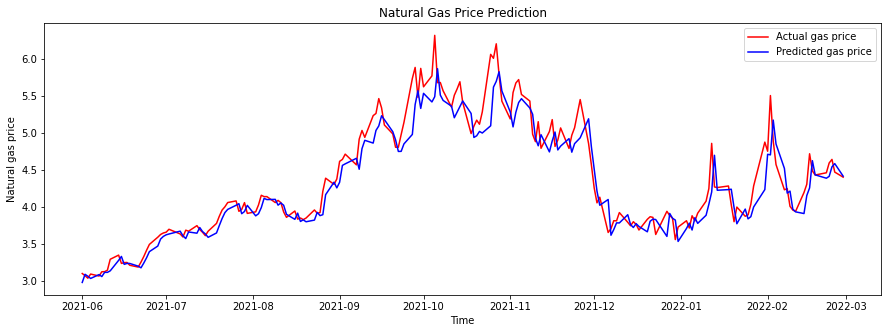

In [60]:
plt.figure(figsize= (15,5))
plt.plot(final_df['Gas price'], color = 'red', label ="Actual gas price")
plt.plot(final_df['Predicted gas price'], color='blue', label = 'Predicted gas price')
plt.title("Natural Gas Price Prediction")
plt.xlabel('Time')
plt.ylabel('Natural gas price')
plt.legend(loc='best')
plt.show()

In [61]:
MSE = math.sqrt(mean_squared_error(final_df['Gas price'], final_df['Predicted gas price']))
print('Mean squared error: ', MSE)
print('R2 Score : ', r2_score(test_data, pred_price))

Mean squared error:  0.2327253144765628
R2 Score :  0.9094993164633858


## Model numer 5 rekurencyjna sieć neuronowa LSTM


In [68]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.LSTM(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True, activation = 'relu'))
model5.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model5.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model5.add(tf.keras.layers.LSTM(units=50))
model5.add(tf.keras.layers.Dropout(0.2))
model5.add(tf.keras.layers.Dense(units=1))
model5.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='loss', patience=10)
model5.fit(X_train, y_train, epochs= 70, batch_size=32, 
          verbose=2, callbacks=[early_stopping])

Epoch 1/70
90/90 - 10s - loss: 0.0130 - 10s/epoch - 116ms/step
Epoch 2/70
90/90 - 6s - loss: 0.0041 - 6s/epoch - 65ms/step
Epoch 3/70
90/90 - 6s - loss: 0.0035 - 6s/epoch - 69ms/step
Epoch 4/70
90/90 - 7s - loss: 0.0031 - 7s/epoch - 73ms/step
Epoch 5/70
90/90 - 7s - loss: 0.0030 - 7s/epoch - 80ms/step
Epoch 6/70
90/90 - 8s - loss: 0.0026 - 8s/epoch - 88ms/step
Epoch 7/70
90/90 - 8s - loss: 0.0025 - 8s/epoch - 91ms/step
Epoch 8/70
90/90 - 10s - loss: 0.0023 - 10s/epoch - 106ms/step
Epoch 9/70
90/90 - 8s - loss: 0.0022 - 8s/epoch - 92ms/step
Epoch 10/70
90/90 - 10s - loss: 0.0020 - 10s/epoch - 114ms/step
Epoch 11/70
90/90 - 11s - loss: 0.0019 - 11s/epoch - 123ms/step
Epoch 12/70
90/90 - 10s - loss: 0.0018 - 10s/epoch - 110ms/step
Epoch 13/70
90/90 - 11s - loss: 0.0017 - 11s/epoch - 117ms/step
Epoch 14/70
90/90 - 12s - loss: 0.0016 - 12s/epoch - 129ms/step
Epoch 15/70
90/90 - 10s - loss: 0.0015 - 10s/epoch - 113ms/step
Epoch 16/70
90/90 - 10s - loss: 0.0014 - 10s/epoch - 112ms/step
Epoch 

In [70]:
new_df5 = pd.concat((train_data, test_data), axis=0)
new_df5 = pd.concat((train_data, test_data), axis=0)
inputs5 = new_df5[len(new_df5) - len(test_data)- 60:].values
inputs5 = inputs5.reshape(-1,1)
inputs5 = scaler.transform(inputs5)
X_test = []
y_test = []
for i in range (60, 248):
    X_test.append(inputs5[i-60:i, 0])
    y_test.append(scaled_data[i,0])
      
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price5 = model5.predict(X_test)
predicted_price5 = scaler.inverse_transform(predicted_price5)
print(predicted_price5)

[[3.0294363]
 [3.135179 ]
 [3.1258738]
 [3.0905094]
 [3.1332486]
 [3.1198115]
 [3.1661923]
 [3.1742783]
 [3.190484 ]
 [3.319239 ]
 [3.3834615]
 [3.2898061]
 [3.284931 ]
 [3.2928188]
 [3.2642395]
 [3.2400894]
 [3.2951055]
 [3.3678439]
 [3.447422 ]
 [3.5206249]
 [3.6105525]
 [3.6504033]
 [3.6706533]
 [3.684027 ]
 [3.7229364]
 [3.671613 ]
 [3.6316419]
 [3.714009 ]
 [3.7099273]
 [3.7729127]
 [3.729171 ]
 [3.6917295]
 [3.650743 ]
 [3.7042062]
 [3.8047762]
 [3.896695 ]
 [3.9725726]
 [4.0133085]
 [4.067285 ]
 [4.0918164]
 [3.9650853]
 [3.9883037]
 [4.0813937]
 [3.94978  ]
 [3.9600213]
 [4.049671 ]
 [4.1731033]
 [4.154314 ]
 [4.1491246]
 [4.078101 ]
 [4.1077924]
 [4.085304 ]
 [3.9675207]
 [3.8982408]
 [3.9772542]
 [3.8814235]
 [3.884593 ]
 [3.8662012]
 [3.8832102]
 [3.9835567]
 [3.9457715]
 [3.9484406]
 [4.216933 ]
 [4.383025 ]
 [4.3002295]
 [4.3682356]
 [4.589918 ]
 [4.619334 ]
 [4.6812334]
 [4.551287 ]
 [4.84649  ]
 [4.938488 ]
 [4.8779335]
 [5.090001 ]
 [5.120163 ]
 [5.262852 ]
 [5.186327 ]

In [71]:
predictions = pd.DataFrame(predicted_price5)
predictions.rename(columns = {0: 'Predicted gas price'}, inplace=True); 
predictions.index = test_data.index
final_df5 = pd.concat([test_data, predictions],1)
final_df5

,Gas price,Predicted gas price
Date,,
2021-06-01,3.104,3.029436
2021-06-02,3.075,3.135179
2021-06-03,3.041,3.125874
2021-06-04,3.097,3.090509
2021-06-07,3.070,3.133249
...,...,...
2022-02-22,4.461,4.408431
2022-02-23,4.593,4.459992
2022-02-24,4.641,4.593961


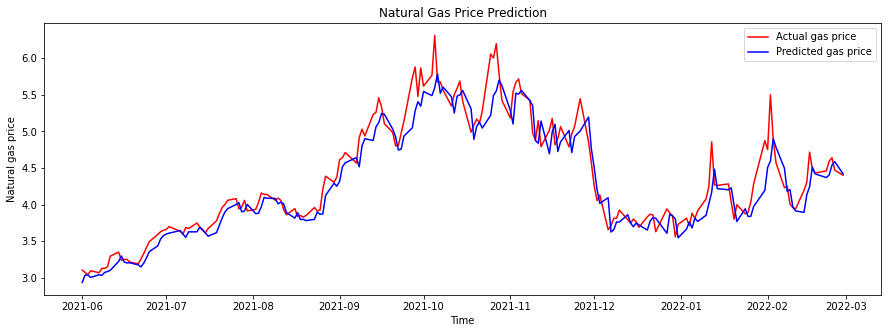

In [72]:
plt.figure(figsize= (15,5))
plt.plot(final_df['Gas price'], color = 'red', label ="Actual gas price")
plt.plot(final_df['Predicted gas price'], color='blue', label = 'Predicted gas price')
plt.title("Natural Gas Price Prediction")
plt.xlabel('Time')
plt.ylabel('Natural gas price')
plt.legend(loc='best')
plt.show()

In [73]:
MSE = math.sqrt(mean_squared_error(final_df['Gas price'], final_df['Predicted gas price']))
print('Mean squared error: ', MSE)
print('R2 Score : ', r2_score(test_data, pred_price))

Mean squared error:  0.23047096837656897
R2 Score :  0.9094993164633858
